In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 17 17:05:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# inferece/images/horses.jpg added
!git clone https://github.com/argusswift/YOLOv4-pytorch.git
%cd YOLOv4-pytorch

Cloning into 'YOLOv4-pytorch'...
remote: Enumerating objects: 957, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 957 (delta 34), reused 63 (delta 28), pack-reused 869
Receiving objects: 100% (957/957), 22.65 MiB | 35.46 MiB/s, done.
Resolving deltas: 100% (552/552), done.
/content/YOLOv4-pytorch


In [3]:
!pip install pycocotools

In [4]:
!pip install tensorboardX

     |████████████████████████████████| 125 kB 3.2 MB/s 


In [5]:
!pip install mmcv

     |████████████████████████████████| 537 kB 4.0 MB/s 
     |████████████████████████████████| 190 kB 58.1 MB/s 
  Created wheel for mmcv: filename=mmcv-1.5.1-py2.py3-none-any.whl size=817971 sha256=da8c1857540f5798c52f8c9b40e18e4d6bde57d9cef4c3ce23d186892c89ec1b
  Stored in directory: /root/.cache/pip/wheels/7e/13/34/79ae316926b309574ce9b81376dd860dea766bcaa7c68d85fb
Successfully built mmcv


Important to pip install apex inside the YOLOv4-pytorch directory in colab

In [6]:
!git clone https://github.com/NVIDIA/apex
%cd apex
!python setup.py install

Cloning into 'apex'...
remote: Enumerating objects: 9704, done.
remote: Counting objects: 100% (775/775), done.
remote: Compressing objects: 100% (387/387), done.
remote: Total 9704 (delta 488), reused 586 (delta 369), pack-reused 8929
Receiving objects: 100% (9704/9704), 14.83 MiB | 24.94 MiB/s, done.
Resolving deltas: 100% (6601/6601), done.
/content/YOLOv4-pytorch/apex


torch.__version__  = 1.11.0+cu113


setup.py:121: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
running install
running bdist_egg
running egg_info
creating apex.egg-info
writing apex.egg-info/PKG-INFO
writing dependency_links to apex.egg-info/dependency_links.txt
writing top-level names to apex.egg-info/top_level.txt
writing manifest file 'apex.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'apex.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/eg

In [7]:
%cd /content/YOLOv4-pytorch/data

/content/YOLOv4-pytorch/data


Create 3 folders VOCtrainval-2007, VOCtrainval-2012, VOCtest-2007
extract the train set first by running the below code and move the dataset into VOCtrainval-2007 and VOCtrainval-2012. such that the folder hierarchy looks as in image 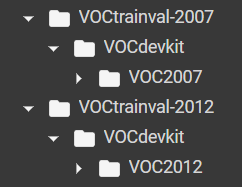

In [8]:
# Download the data.

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
# Extract the data.
!tar -xvf VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_06-Nov-2007.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/001732.jpg
VOCdevkit/VOC2007/JPEGImages/001733.jpg
VOCdevkit/VOC2007/JPEGImages/001734.jpg
VOCdevkit/VOC2007/JPEGImages/001738.jpg
VOCdevkit/VOC2007/JPEGImages/001739.jpg
VOCdevkit/VOC2007/JPEGImages/001741.jpg
VOCdevkit/VOC2007/JPEGImages/001746.jpg
VOCdevkit/VOC2007/JPEGImages/001747.jpg
VOCdevkit/VOC2007/JPEGImages/001749.jpg
VOCdevkit/VOC2007/JPEGImages/001750.jpg
VOCdevkit/VOC2007/JPEGImages/001752.jpg
VOCdevkit/VOC2007/JPEGImages/001754.jpg
VOCdevkit/VOC2007/JPEGImages/001755.jpg
VOCdevkit/VOC2007/JPEGImages/001756.jpg
VOCdevkit/VOC2007/JPEGImages/001758.jpg
VOCdevkit/VOC2007/JPEGImages/001759.jpg
VOCdevkit/VOC2007/JPEGImages/001761.jpg
VOCdevkit/VOC2007/JPEGImages/001765.jpg
VOCdevkit/VOC2007/JPEGImages/001766.jpg
VOCdevkit/VOC2007/JPEGImages/001768.jpg
VOCdevkit/VOC2007/JPEGImages/001771.jpg
VOCdevkit/VOC2007/JPEGImages/001772.jpg
VOCdevkit/VOC2007/JPEGImages/001775.jpg
VOCdevkit/VOC2007/JPEGImages/

now run the code cell below and similarly move it into VOCtest-2007 folder with same heirarchy as shown for above folders. (Important to not extract the test set before moving the train dataset into respective folders....since if extracted at once, ends up merging VOCtrainval-2007 and VOCtest-2007)

In [9]:
!tar -xvf VOCtest_06-Nov-2007.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

Need to modify yolov4_config.py in config to change MODEL_TYPE to yolov4 and if running in colab change the DATA_PATH in the 4th line as follows
 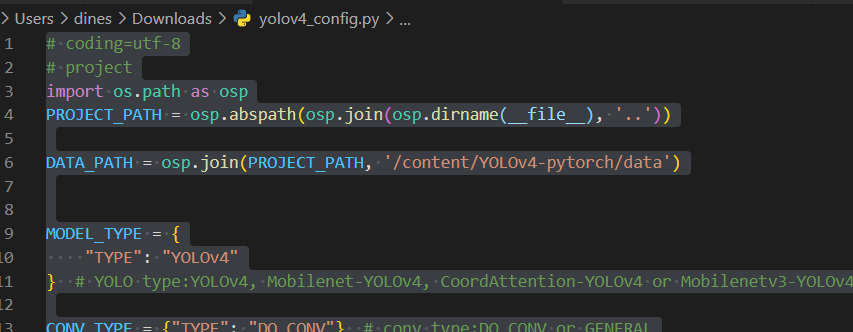

Also change voc.py in utils as follows 
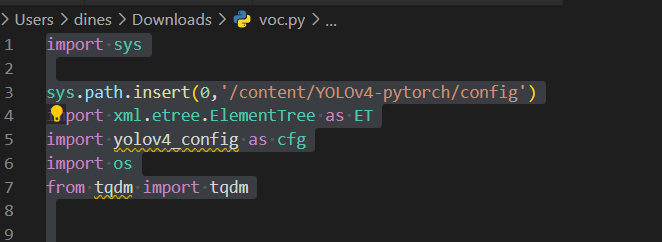

Also change evaluator.py in eval, by changing the line 226 as follows
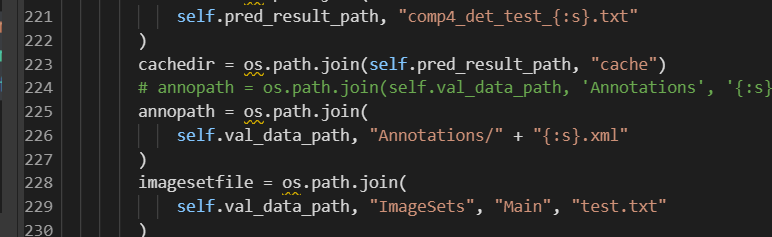

In [10]:
%cd /content/YOLOv4-pytorch/config

/content/YOLOv4-pytorch/config


In [11]:

!python3 "/content/YOLOv4-pytorch/utils/voc.py"

100% 5011/5011 [00:00<00:00, 13133.83it/s]
100% 11540/11540 [00:00<00:00, 12717.80it/s]
100% 4952/4952 [00:00<00:00, 13713.17it/s]
The number of images for train and test are :train : 5011 | test : 4952


Create a folder weight in the YOLOv4-pytorch directory and put the yolov4.weights file inside

In [12]:
%cd /content/YOLOv4-pytorch

/content/YOLOv4-pytorch


In [14]:
!CUDA_VISIBLE_DEVICES=0 nohup python -u train.py  --weight_path weight/yolov4.weights --gpu_id 0 > nohup.log 2>&1 &